# NY Taxi, Applied ML Notebook

## Introduction

Load taxi data in parquet format.

In [206]:
import pandas as pd
import numpy as np

In [15]:
taxi_data = pd.read_parquet("./data/yellow_tripdata_2019-01.parquet", engine="pyarrow")
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,None
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,None
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,None
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,None
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,None


In [16]:
taxi_data.shape

(7696617, 19)

## Data Exploration

In [17]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

Keep only a subset of columns

In [18]:
taxi_data = taxi_data[["tpep_pickup_datetime", "tpep_dropoff_datetime",
       "passenger_count", "trip_distance", "RatecodeID","PULocationID",
       "DOLocationID", "payment_type",  "total_amount"]]

In [19]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


### Plot a historgram of each column

Matplotlib is building the font cache; this may take a moment.


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

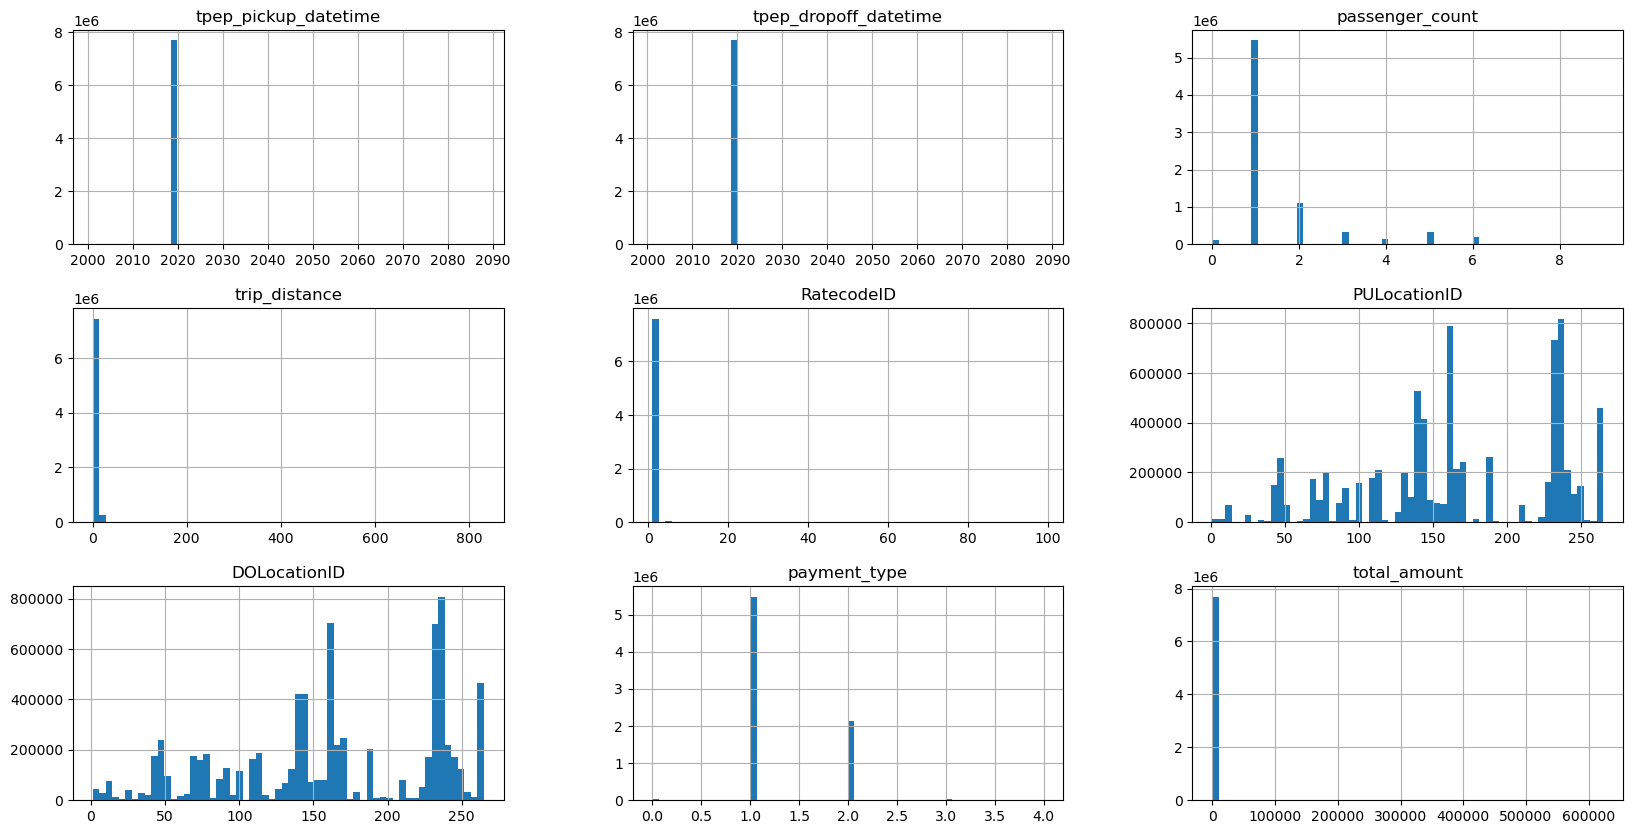

In [21]:
taxi_data.hist(figsize=(20,10), bins=60)

In [22]:
taxi_data["RatecodeID"].value_counts()

RatecodeID
1.0     7430288
2.0      166093
5.0       54570
3.0       11801
4.0        4895
99.0        252
6.0          46
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

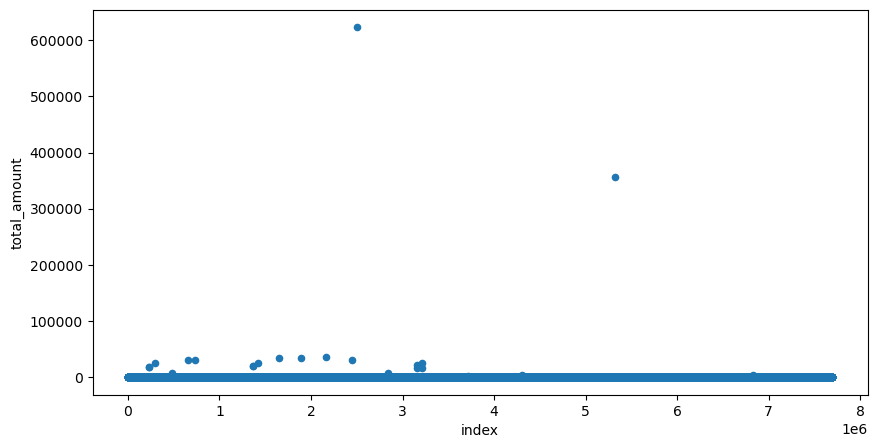

In [23]:
taxi_data.reset_index().plot(kind="scatter", y="total_amount", x="index", figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

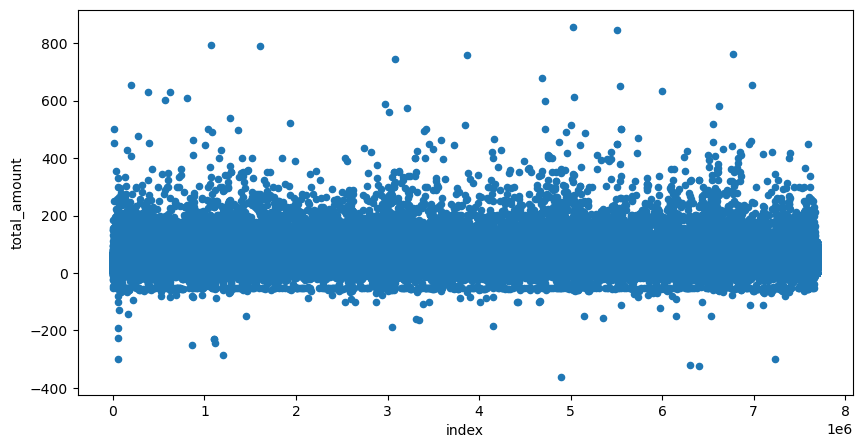

In [24]:
taxi_data[taxi_data["total_amount"]<1000].reset_index().plot(kind="scatter", y="total_amount", x="index", figsize=(10,5))

### Identify negative total amounts

In [25]:
taxi_data[taxi_data["total_amount"]<0].shape

(7127, 9)

<Axes: xlabel='index', ylabel='total_amount'>

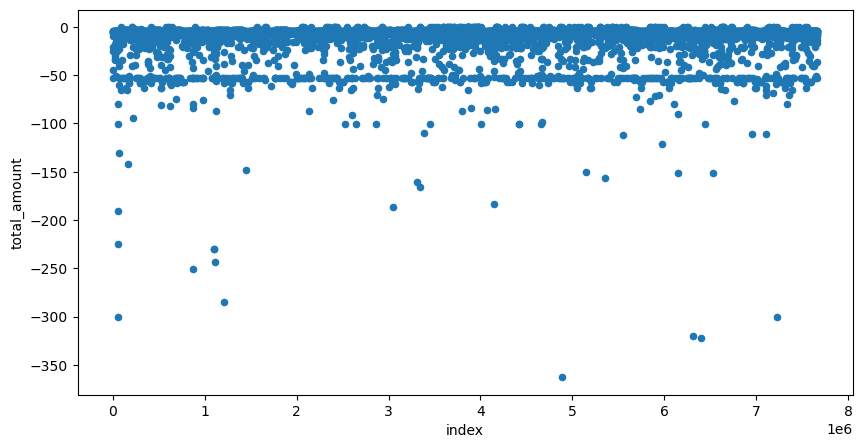

In [27]:
taxi_data[taxi_data["total_amount"]<0].reset_index().plot(kind="scatter", y="total_amount", x="index", figsize=(10,5))

In [28]:
taxi_data[taxi_data["total_amount"]<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
663,2019-01-01 00:32:56,2019-01-01 00:33:35,2.0,0.10,1.0,148,148,3,-3.8
2402,2019-01-01 00:14:18,2019-01-01 00:40:55,1.0,4.13,1.0,170,238,4,-20.3
2541,2019-01-01 00:31:27,2019-01-01 00:42:39,1.0,1.35,1.0,162,234,4,-9.8
2544,2019-01-01 00:45:57,2019-01-01 00:46:07,1.0,0.00,1.0,234,234,4,-3.8
2547,2019-01-01 00:48:35,2019-01-01 00:49:59,1.0,0.16,1.0,234,234,4,-4.3


In [29]:
taxi_data[taxi_data["total_amount"]<0]["payment_type"].value_counts()

payment_type
3    4083
4    2667
2     376
1       1
Name: count, dtype: int64

<Axes: >

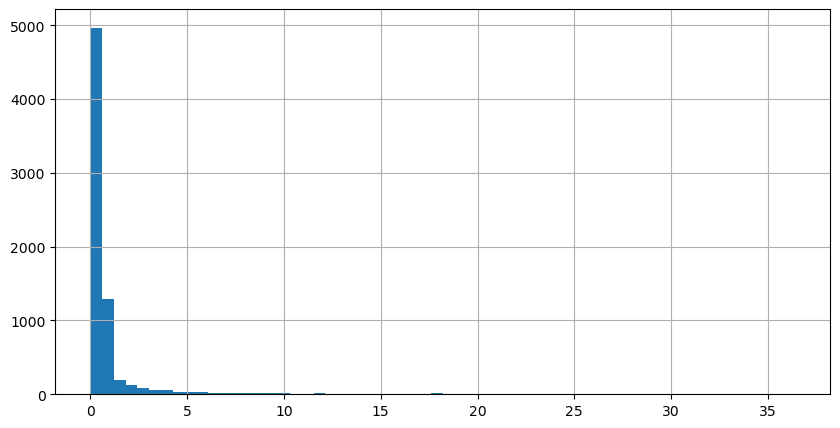

In [30]:
taxi_data[taxi_data["total_amount"]<0]["trip_distance"].hist(bins=60, figsize=(10,5))

### Identify 0 total amounts

In [32]:
print(taxi_data[taxi_data["total_amount"]==0].shape)
taxi_data[taxi_data["total_amount"]==0].head()

(1643, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
3552,2019-01-01 00:18:46,2019-01-01 00:18:46,1.0,0.0,5.0,186,264,2,0.0
9138,2019-01-01 00:41:47,2019-01-01 00:41:47,1.0,0.0,5.0,246,264,2,0.0
13256,2019-01-01 00:19:38,2019-01-01 00:20:35,1.0,0.0,1.0,193,193,1,0.0
13257,2019-01-01 00:43:34,2019-01-01 00:43:34,1.0,0.0,1.0,7,7,2,0.0
13258,2019-01-01 00:02:52,2019-01-01 00:02:52,1.0,0.0,1.0,264,7,2,0.0


In [33]:
taxi_data[taxi_data["total_amount"]==0]["payment_type"].value_counts()

payment_type
1    813
2    569
0    231
3     29
4      1
Name: count, dtype: int64

<Axes: >

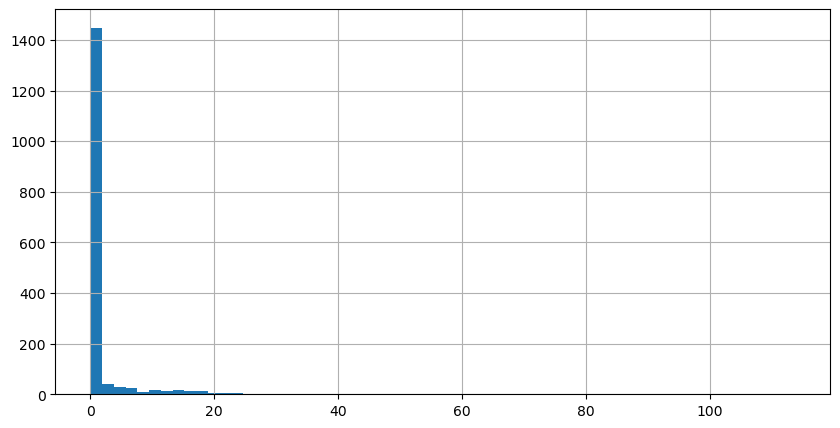

In [34]:
taxi_data[taxi_data["total_amount"]==0]["trip_distance"].hist(bins=60, figsize=(10,5))

In [35]:
taxi_data[taxi_data["total_amount"]==0]["trip_distance"].value_counts()

trip_distance
0.00     1323
0.03        9
0.01        8
0.06        6
1.00        4
         ... 
11.86       1
4.59        1
20.92       1
18.37       1
12.30       1
Name: count, Length: 256, dtype: int64

### Identify very high total amounts

<Axes: xlabel='index', ylabel='total_amount'>

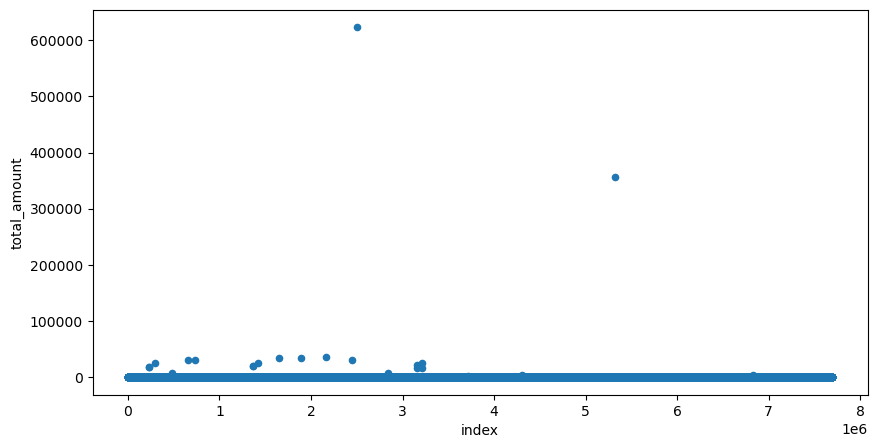

In [37]:
taxi_data.reset_index().plot(kind="scatter", y="total_amount", x="index", figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

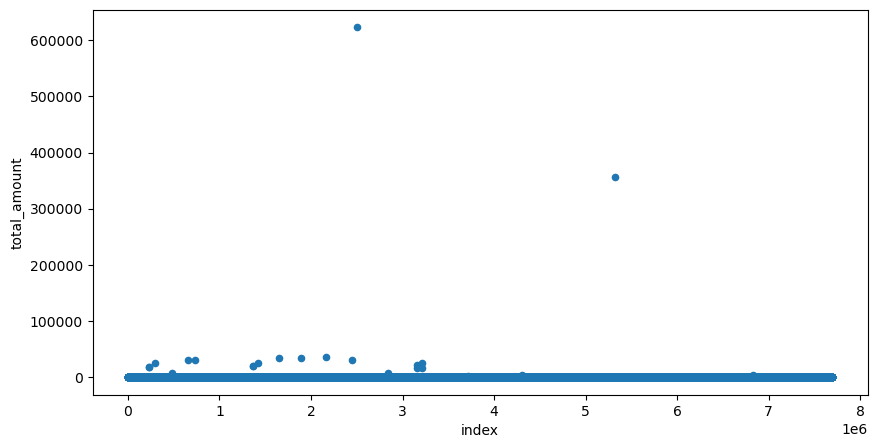

In [39]:
taxi_data.reset_index().plot(kind="scatter", y="total_amount", x="index", figsize=(10,5))

In [40]:
taxi_data[taxi_data["total_amount"]>200].shape

(1166, 9)

In [41]:
taxi_data["total_amount"].mean()

15.810651344610214

## Data Cleaning

Also check passenger count for NA values and 0 values.

In [52]:
taxi_data_filtered = taxi_data[(taxi_data["total_amount"]>=0)&(taxi_data["total_amount"]<200)&(taxi_data["passenger_count"]>0)]
print(taxi_data.shape)
taxi_data_filtered.shape

(7696617, 9)


(7542337, 9)

In [51]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

In [53]:
taxi_data_filtered["passenger_count"]

0          1.0
1          1.0
2          3.0
3          5.0
4          5.0
          ... 
7667940    1.0
7667941    1.0
7667942    1.0
7667943    1.0
7667944    1.0
Name: passenger_count, Length: 7542337, dtype: float64

## Data Preparation

In [70]:
taxi_data_prepared = taxi_data_filtered.copy()
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
total_amount                    float64
dtype: object

In [75]:
taxi_data_prepared.loc[:,"RatecodeID"]   = taxi_data_prepared["RatecodeID"].astype(str)
taxi_data_prepared.loc[:,"PULocationID"] = taxi_data_prepared["PULocationID"].astype(str)
taxi_data_prepared.loc[:,"DOLocationID"] = taxi_data_prepared["DOLocationID"].astype(str)
taxi_data_prepared.loc[:,"payment_type"] = taxi_data_prepared["payment_type"].astype(str)

In [76]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [77]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55


In [78]:
taxi_data_prepared["transaction_date"] = pd.to_datetime(taxi_data_prepared["tpep_pickup_datetime"].dt.date)
taxi_data_prepared["transaction_year"] = taxi_data_prepared["tpep_pickup_datetime"].dt.year
taxi_data_prepared["transaction_month"] = taxi_data_prepared["tpep_pickup_datetime"].dt.month
taxi_data_prepared["transaction_day"] =  taxi_data_prepared["tpep_pickup_datetime"].dt.day
taxi_data_prepared["transaction_hour"] = taxi_data_prepared["tpep_pickup_datetime"].dt.hour

In [79]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,151,239,1,9.95,2019-01-01,2019,1,1,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,239,246,1,16.30,2019-01-01,2019,1,1,0
2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,236,236,1,5.80,2018-12-21,2018,12,21,13
3,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,193,193,2,7.55,2018-11-28,2018,11,28,15
4,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,193,193,2,55.55,2018-11-28,2018,11,28,15


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_date'}>],
       [<Axes: title={'center': 'transaction_year'}>,
        <Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>],
       [<Axes: title={'center': 'transaction_hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

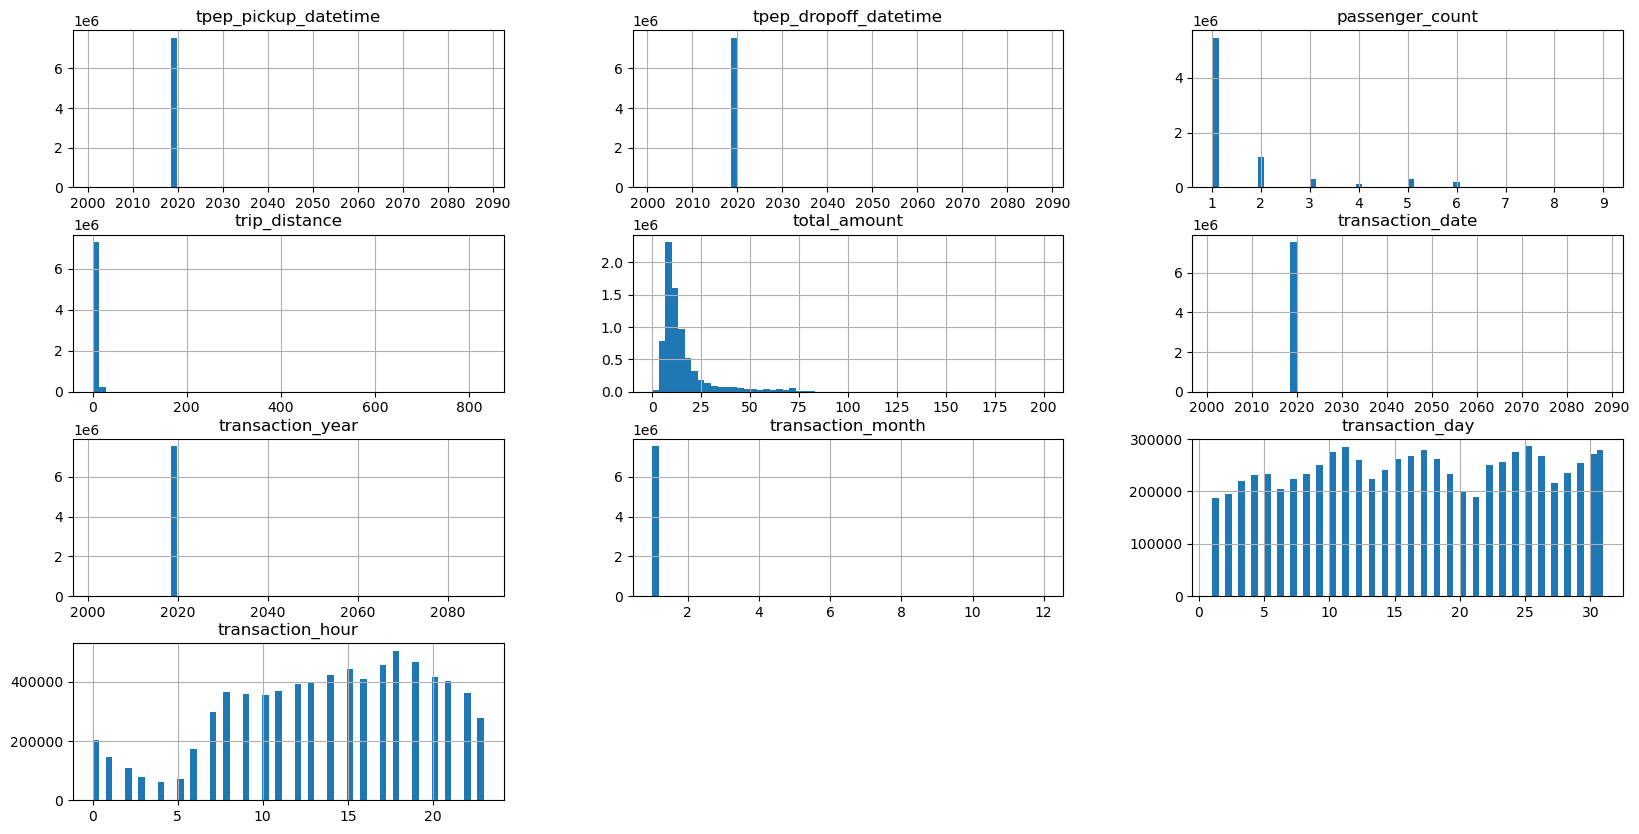

In [80]:
taxi_data_prepared.hist(figsize=(20,10), bins=60)

In [81]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared["transaction_year"]==2019]
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared["transaction_month"]==1]

In [82]:
categorical_columns = ["PULocationID","transaction_date","transaction_month","transaction_day","transaction_hour"]
numerical_columns = ["trip_distance","total_amount"]
all_needed_columns = categorical_columns + numerical_columns

In [83]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(7541801, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,151,2019-01-01,1,1,0,1.5,9.95
1,239,2019-01-01,1,1,0,2.6,16.30
7,163,2019-01-01,1,1,0,1.3,9.05
8,229,2019-01-01,1,1,0,3.7,18.50
9,141,2019-01-01,1,1,0,2.1,13.00


In [87]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region["count_of_transactions"] = main_taxi_df.groupby(categorical_columns).count().reset_index()["total_amount"]
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(102164, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


<Axes: >

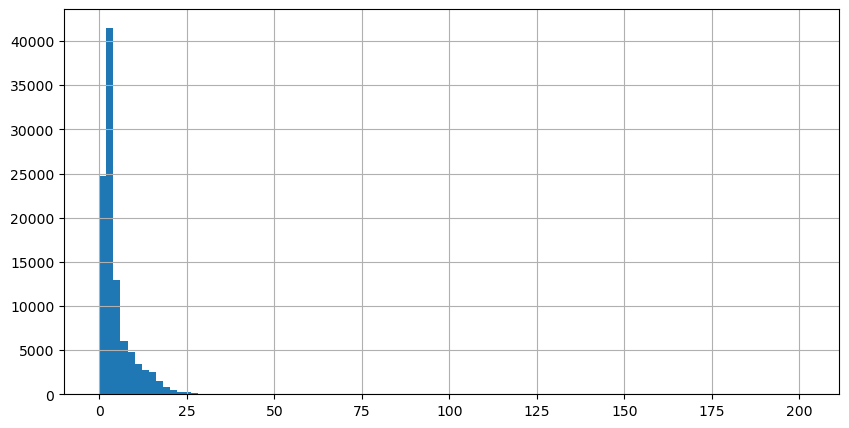

In [88]:
taxi_grouped_by_region["trip_distance"].hist(bins=100, figsize=(10,5))

<Axes: >

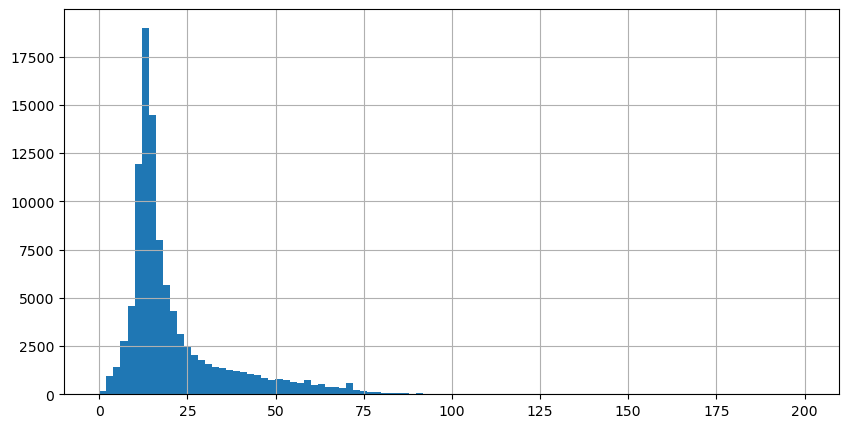

In [89]:
taxi_grouped_by_region["total_amount"].hist(bins=100, figsize=(10,5))

## Benchmark Model

In [90]:
data_for_benchmark_model = taxi_grouped_by_region.copy()

In [91]:
data_for_benchmark_model

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.00,21.800,1
1,1,2019-01-01,1,1,5,0.00,87.300,1
2,1,2019-01-01,1,1,6,0.00,80.300,1
3,1,2019-01-01,1,1,8,0.00,128.580,2
4,1,2019-01-01,1,1,10,16.90,43.245,4
...,...,...,...,...,...,...,...,...
102159,98,2019-01-31,1,31,18,16.66,58.060,1
102160,99,2019-01-18,1,18,18,1.66,9.800,1
102161,99,2019-01-26,1,26,8,0.42,6.000,1
102162,99,2019-01-30,1,30,7,2.87,18.050,1


In [92]:
categorical_features_benchmark = ["PULocationID","transaction_month","transaction_day","transaction_hour"]
input_features_benchmark  = categorical_features_benchmark + ["trip_distance"]
target_feature_benchmark  = "total_amount"

In [94]:
from sklearn.model_selection import train_test_split

### Train/Test Split

In [99]:
X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]



In [101]:
# one-hot encode
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

### Fit Model to the Data

In [103]:
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

DecisionTreeRegressor(max_depth=10)

### Evaluate Model

In [105]:
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print("mean_absolute_error", mean_absolute_error(y_test_b, y_pred_b))
print("mean_squared_error", mean_squared_error(y_test_b, y_pred_b))
print("root_mean_squared_error", sqrt(mean_squared_error(y_test_b, y_pred_b)))
print("r2", r2_score(y_test_b, y_pred_b))

mean_absolute_error 3.387319071856398
mean_squared_error 63.686280599660755
root_mean_squared_error 7.980368450119378
r2 0.7702191985971995


<Axes: xlabel='true', ylabel='pred'>

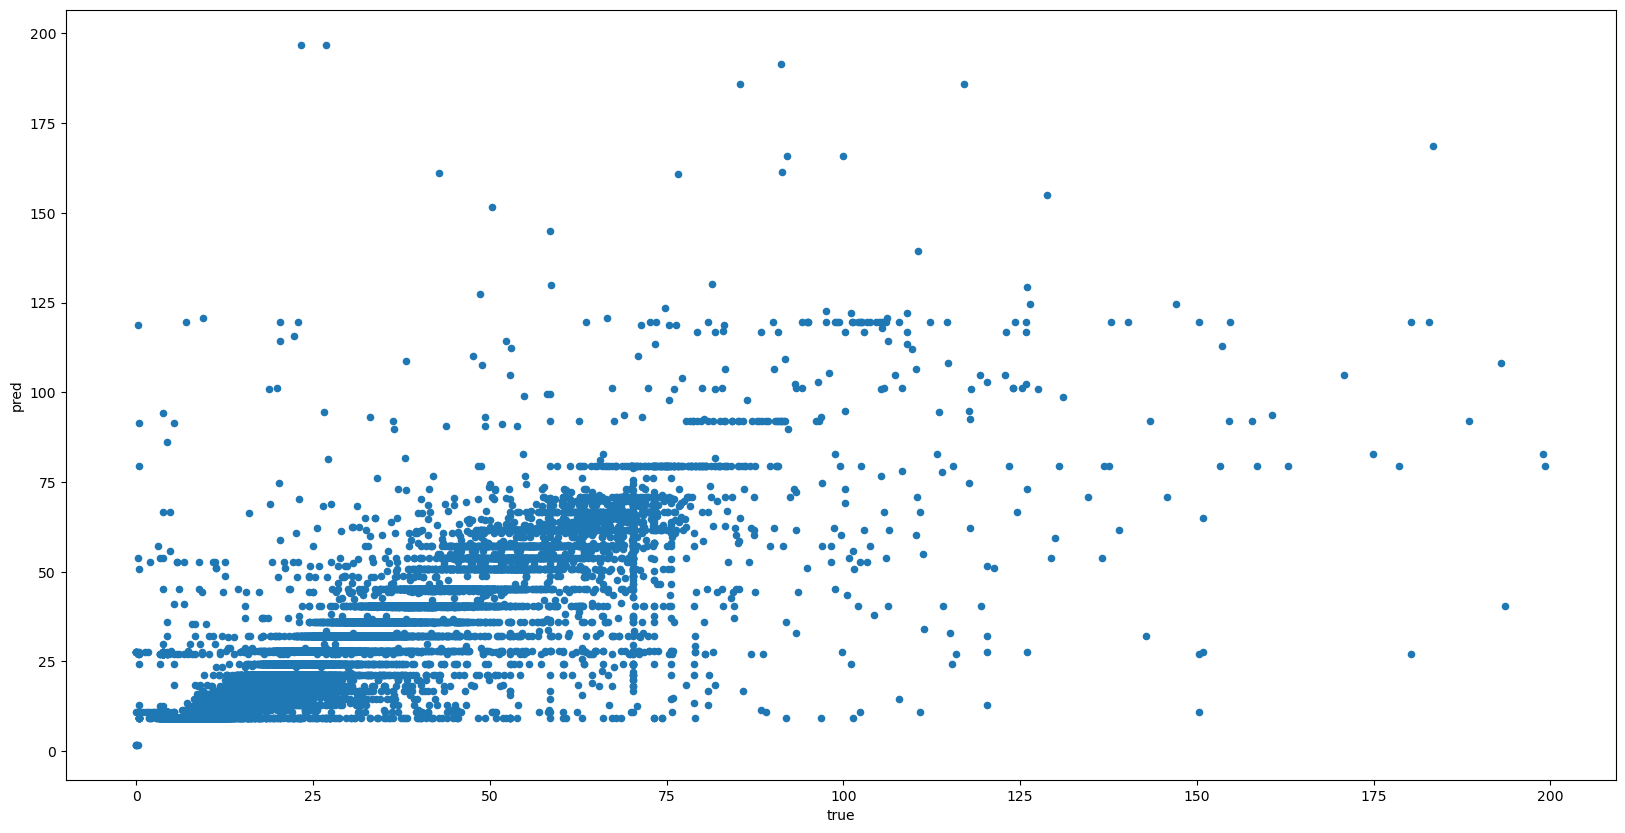

In [106]:
data = {"true": y_test_b, "pred": y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind="scatter", x="true", y="pred")

### Fix Problems

Omit "trip_distance" as an input feature.

In [107]:
categorical_features_benchmark = ["PULocationID", "transaction_month", "transaction_day", "transaction_hour"]
input_features_benchmark  = categorical_features_benchmark
target_feature_benchmark  = "total_amount"

# Train and test split
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

# one-hot encode
X_bench = pd.get_dummies(X_bench)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

# Fit a model
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_b, y_train_b)

# Evaluate model
model_at_hand = tree

y_pred_b = model_at_hand.predict(X_test_b)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print("mean_absolute_error", mean_absolute_error(y_test_b, y_pred_b))
print("mean_squared_error", mean_squared_error(y_test_b, y_pred_b))
print("root_mean_squared_error", sqrt(mean_squared_error(y_test_b, y_pred_b)))
print("r2", r2_score(y_test_b, y_pred_b))

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
mean_absolute_error 9.832970940443952
mean_squared_error 223.90347665886773
root_mean_squared_error 14.963404581139539
r2 0.1921537916940005


<Axes: xlabel='true', ylabel='pred'>

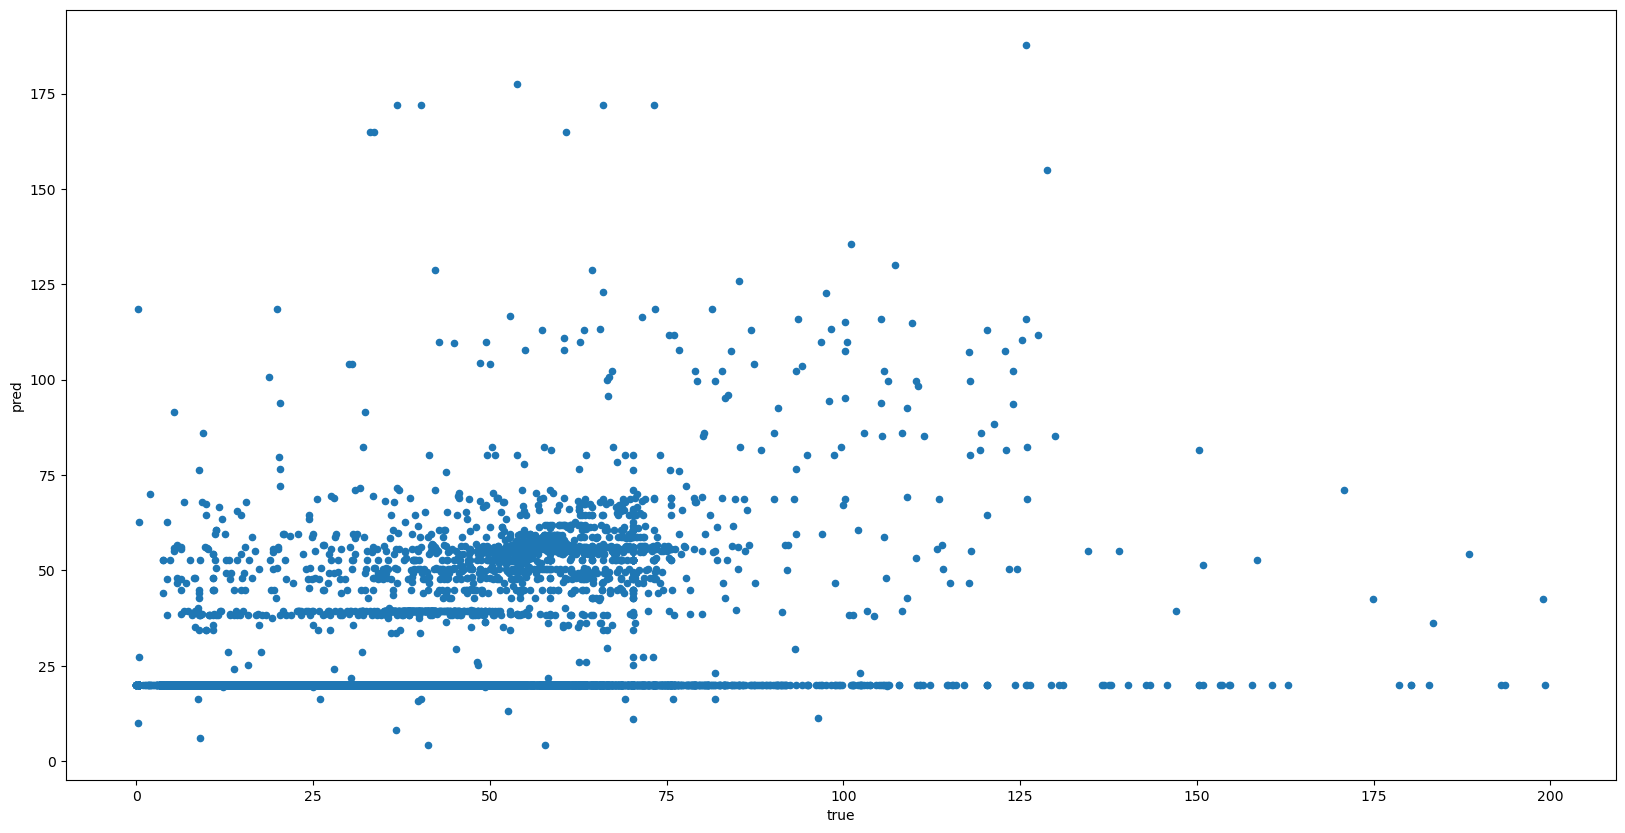

In [108]:
data = {"true": y_test_b, "pred": y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind="scatter", x="true", y="pred")

## Feature Engineering

In [109]:
taxi_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-01-01,1,1,2,0.0,21.800,1
1,1,2019-01-01,1,1,5,0.0,87.300,1
2,1,2019-01-01,1,1,6,0.0,80.300,1
3,1,2019-01-01,1,1,8,0.0,128.580,2
4,1,2019-01-01,1,1,10,16.9,43.245,4


In [110]:
data_with_new_features = taxi_grouped_by_region.copy()

### Data-Related Features

In [111]:
data_with_new_features["transaction_week_day"] = data_with_new_features["transaction_date"].dt.weekday
data_with_new_features["weekend"] = data_with_new_features["transaction_week_day"].apply(lambda x: True if x == 5 or x == 6 else False)

In [113]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start="2018",
                        end="2020").date
data_with_new_features["is_holiday"] = data_with_new_features["transaction_date"].isin(holidays)

In [114]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True


### Borough Information

In [115]:
zone_lookup = pd.read_csv("data/taxi_zone_lookup.csv")
zone_lookup = zone_lookup[["LocationID","Borough"]]
zone_lookup["LocationID"] = zone_lookup["LocationID"].astype(str)
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [116]:
data_with_new_features = data_with_new_features.merge(zone_lookup, left_on="PULocationID", right_on="LocationID", how="left")
data_with_new_features.drop("LocationID", axis=1, inplace=True)
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR


In [117]:
data_with_new_features["Borough"].value_counts()

Borough
Manhattan        45291
Brooklyn         23506
Queens           21830
Bronx             9519
Unknown            744
Staten Island      302
EWR                265
Name: count, dtype: int64

### Weather-Related Features

In [134]:
nyc_weather = pd.read_csv("data/nyc_weather.csv")
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,31.12.2019 22:00,6.1,65,6,100%.,0.3
1,31.12.2019 19:00,6.7,71,5,70 – 80%.,NaN
2,31.12.2019 16:00,7.2,66,5,50%.,NaN
3,31.12.2019 13:00,6.1,76,3,100%.,Trace of precipitation
4,31.12.2019 10:00,4.4,83,2,100%.,Trace of precipitation


In [135]:
nyc_weather.shape

(2936, 6)

In [136]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                 object
amount of precipitation     object
dtype: object

In [137]:
nyc_weather["cloud cover"].value_counts()

cloud cover
70 – 80%.                                                     973
100%.                                                         896
20–30%.                                                       479
50%.                                                          413
no clouds                                                     168
Sky obscured by fog and/or other meteorological phenomena.      3
Name: count, dtype: int64

In [138]:
nyc_weather["amount of precipitation"].value_counts()

amount of precipitation
Trace of precipitation    266
0.3                        61
2.0                        49
1.0                        45
0.5                        42
0.8                        42
4.0                        33
5.0                        24
3.0                        23
6.0                        19
7.0                        13
8.0                        13
9.0                        11
10.0                       10
13.0                        7
12.0                        7
15.0                        6
11.0                        5
16.0                        3
22.0                        2
14.0                        2
29.0                        2
63.0                        1
21.0                        1
68.0                        1
17.0                        1
20.0                        1
30.0                        1
35.0                        1
34.0                        1
24.0                        1
18.0                        1
25.0            

In [139]:
nyc_weather.isna().sum()

date and time                 0
temperature                   0
humidity                      0
wind speed                    0
cloud cover                   4
amount of precipitation    2240
dtype: int64

In [140]:
nyc_weather["amount of precipitation"] = nyc_weather["amount of precipitation"].replace("Trace of precipitation", 0.1)
nyc_weather["amount of precipitation"] = nyc_weather["amount of precipitation"].astype(float)

In [141]:
nyc_weather["amount of precipitation"].interpolate(inplace=True)

In [142]:
nyc_weather["cloud cover"] = nyc_weather["cloud cover"].replace("70 – 80%.", 0.7)
nyc_weather["cloud cover"] = nyc_weather["cloud cover"].replace("100%.", 1)
nyc_weather["cloud cover"] = nyc_weather["cloud cover"].replace("20–30%.", 0.3)
nyc_weather["cloud cover"] = nyc_weather["cloud cover"].replace("50%.", 0.5)
nyc_weather["cloud cover"] = nyc_weather["cloud cover"].replace("no clouds", 0)
nyc_weather["cloud cover"] = nyc_weather["cloud cover"].replace("Sky obscured by fog and/or other meteorological phenomena.", 1)
nyc_weather["cloud cover"] = nyc_weather["cloud cover"].astype(float)
nyc_weather["cloud cover"].interpolate(inplace=True)

In [143]:
nyc_weather.dtypes

date and time               object
temperature                float64
humidity                     int64
wind speed                   int64
cloud cover                float64
amount of precipitation    float64
dtype: object

In [149]:
pd.to_datetime(nyc_weather["date and time"]).dt.hour

0       22
1       19
2       16
3       13
4       10
        ..
2931    13
2932    10
2933     7
2934     4
2935     1
Name: date and time, Length: 2936, dtype: int32

In [163]:
nyc_weather["date and time"] = pd.to_datetime(nyc_weather["date and time"])
nyc_weather["hour"] = nyc_weather["date and time"].dt.hour
nyc_weather["month"] = nyc_weather["date and time"].dt.month
nyc_weather["day"] = nyc_weather["date and time"].dt.day

In [164]:
nyc_weather.head()

,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,2019-12-31 22:00:00,6.1,65,6,1.0,0.300000,22,12,31
1,2019-12-31 19:00:00,6.7,71,5,0.7,0.233333,19,12,31
2,2019-12-31 16:00:00,7.2,66,5,0.5,0.166667,16,12,31
3,2019-12-31 13:00:00,6.1,76,3,1.0,0.100000,13,12,31
4,2019-12-31 10:00:00,4.4,83,2,1.0,0.100000,10,12,31


In [165]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR


In [166]:
nyc_taxi_with_weather = data_with_new_features.merge(nyc_weather, left_on = ["transaction_month","transaction_day","transaction_hour"], right_on = ["month","day","hour"], how="left")

print(nyc_taxi_with_weather.shape)
nyc_taxi_with_weather.head()

(102164, 21)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,...,Borough,date and time,temperature,humidity,wind speed,cloud cover,amount of precipitation,hour,month,day
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,...,EWR,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,...,EWR,2019-01-01 10:00:00,15.6,62.0,11.0,0.7,0.473333,10.0,1.0,1.0


In [167]:
nyc_taxi_with_weather = nyc_taxi_with_weather.drop(["date and time","hour","month","day"], axis=1)

In [168]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,1,2019-01-01,1,1,2,0.0,21.800,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
1,1,2019-01-01,1,1,5,0.0,87.300,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
2,1,2019-01-01,1,1,6,0.0,80.300,1,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
3,1,2019-01-01,1,1,8,0.0,128.580,2,1,False,True,EWR,NaN,NaN,NaN,NaN,NaN
4,1,2019-01-01,1,1,10,16.9,43.245,4,1,False,True,EWR,15.6,62.0,11.0,0.7,0.473333


In [169]:
nyc_taxi_with_weather.isna().sum()

PULocationID                   0
transaction_date               0
transaction_month              0
transaction_day                0
transaction_hour               0
trip_distance                  0
total_amount                   0
count_of_transactions          0
transaction_week_day           0
weekend                        0
is_holiday                     0
Borough                      707
temperature                65474
humidity                   65474
wind speed                 65474
cloud cover                65474
amount of precipitation    65474
dtype: int64

In [170]:
nyc_taxi_with_weather = nyc_taxi_with_weather.sort_values(["transaction_date","transaction_hour"]).reset_index().drop("index",axis=1)

In [171]:
nyc_taxi_with_weather = nyc_taxi_with_weather.interpolate()
nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method="bfill")
nyc_taxi_with_weather.isna().sum()

/var/folders/gs/n1wpy8_x6gb0t5zjhlcm5p440000gp/T/ipykernel_42976/1400942564.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  nyc_taxi_with_weather = nyc_taxi_with_weather.interpolate()
/var/folders/gs/n1wpy8_x6gb0t5zjhlcm5p440000gp/T/ipykernel_42976/1400942564.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nyc_taxi_with_weather = nyc_taxi_with_weather.fillna(method='bfill')


PULocationID               0
transaction_date           0
transaction_month          0
transaction_day            0
transaction_hour           0
trip_distance              0
total_amount               0
count_of_transactions      0
transaction_week_day       0
weekend                    0
is_holiday                 0
Borough                    0
temperature                0
humidity                   0
wind speed                 0
cloud cover                0
amount of precipitation    0
dtype: int64

In [172]:
nyc_taxi_with_weather.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation
0,10,2019-01-01,1,1,0,3.020000,14.300000,2,1,False,True,Queens,8.3,97.0,0.0,1.0,29.0
1,100,2019-01-01,1,1,0,2.801852,18.130000,54,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0
2,106,2019-01-01,1,1,0,2.593333,15.373333,3,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0
3,107,2019-01-01,1,1,0,2.453438,14.925496,413,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0
4,11,2019-01-01,1,1,0,1.795000,9.300000,2,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0


## Model Training

In [173]:
data_for_model = nyc_taxi_with_weather.copy()

In [175]:
categorical_features = ["PULocationID", "transaction_month", "transaction_day",
       "transaction_hour", "transaction_week_day", "weekend", "is_holiday", "Borough"]
input_features = categorical_features + ["temperature", "humidity", "wind speed", "cloud cover",
       "amount of precipitation"]
target_feature = "total_amount"

### Train/Test Split

In [177]:
from sklearn.model_selection import train_test_split

X = data_for_model[input_features]
y = data_for_model[target_feature]

# one-hot encode
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Decision Tree

In [178]:
from sklearn.tree import DecisionTreeRegressor 

decision_tree = DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [179]:
model_at_hand = decision_tree

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print("mean_absolute_error", mean_absolute_error(y_test, y_pred))
print("mean_squared_error", mean_squared_error(y_test, y_pred))
print("root_mean_squared_error", sqrt(mean_squared_error(y_test, y_pred)))
print("r2", r2_score(y_test, y_pred))

mean_absolute_error 8.38920752434732
mean_squared_error 192.24927896797217
root_mean_squared_error 13.865398622757738
r2 0.3085816507584086


<Axes: xlabel='true', ylabel='pred'>

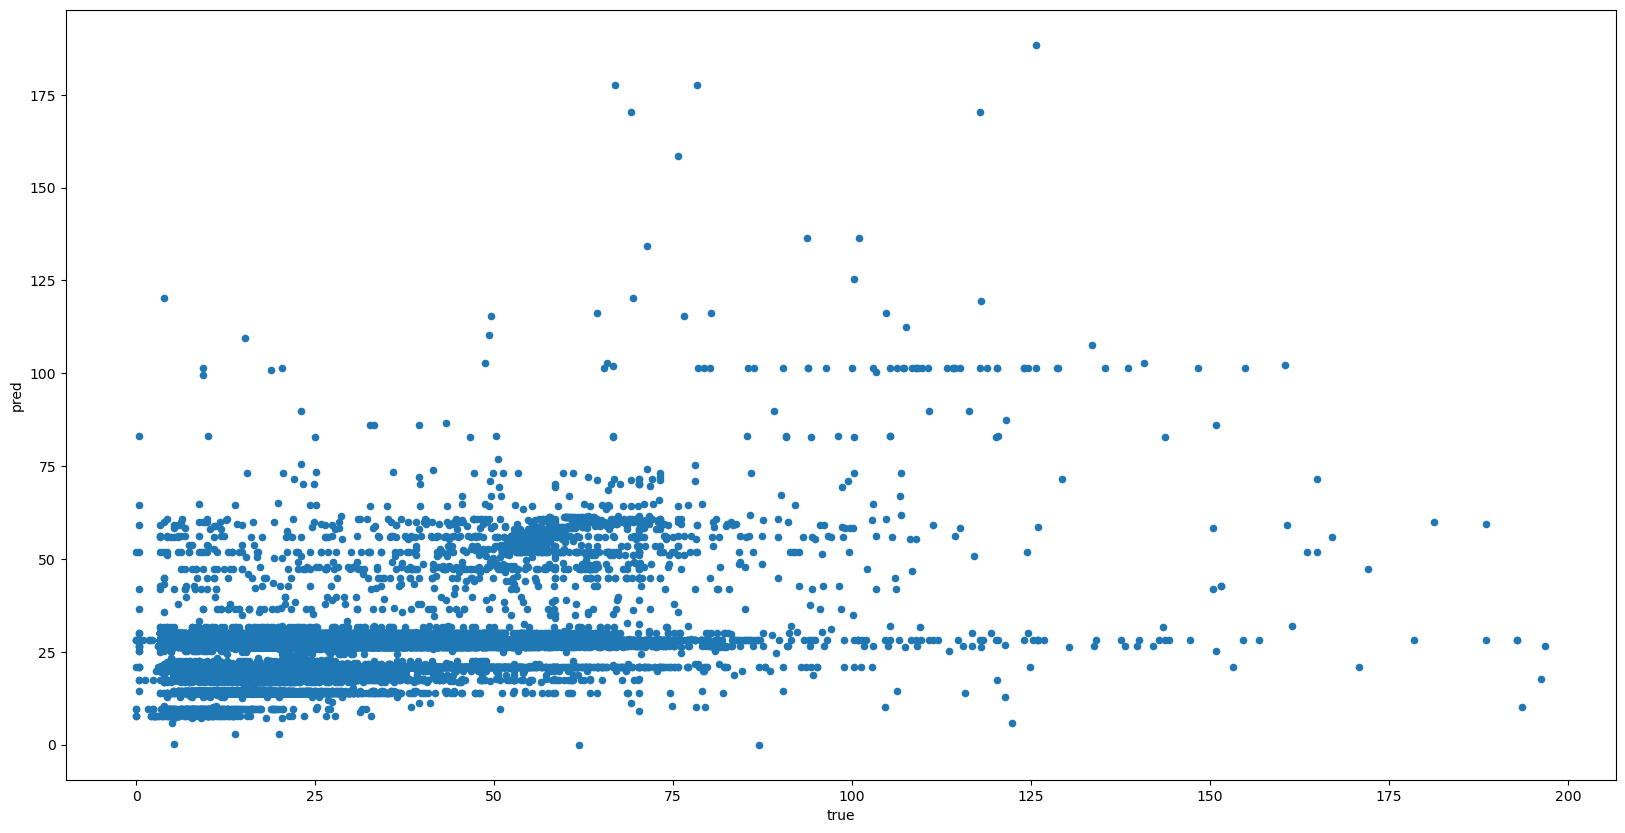

In [180]:
data = {"true": y_test, "pred": y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind="scatter", x="true", y="pred")

### Overfit

In [182]:
X_train_overfit = X_train
y_train_overfit = y_train

X_test_overfit = X_test
y_test_overfit = y_test

In [183]:
rmse_scores = {"max_depth":[] ,"rmse_train":[], "rmse_test":[]}

for md in [2, 5, 8, 10, 15, 20, 30, 50, 70, 100, 150]:
    print(md)
    decision_tree_overfit = DecisionTreeRegressor(max_depth=md)
    decision_tree_overfit.fit(X_train_overfit, y_train_overfit)
    
    model_at_hand_overfit = decision_tree_overfit
    
    y_pred_train = model_at_hand_overfit.predict(X_train_overfit)
    rmse_train = sqrt(mean_squared_error(y_train_overfit, y_pred_train))
    
    y_pred_test = model_at_hand_overfit.predict(X_test_overfit)
    rmse_test = sqrt(mean_squared_error(y_test_overfit, y_pred_test))
    
    rmse_scores["max_depth"].append(md)
    rmse_scores["rmse_train"].append(rmse_train)
    rmse_scores["rmse_test"].append(rmse_test)

2
5
8
10
15
20
30
50
70
100
150


In [184]:
pd.DataFrame.from_dict(rmse_scores)

,max_depth,rmse_train,rmse_test
0,2,1.499925e+01,15.111874
1,5,1.419760e+01,14.330263
2,8,1.353709e+01,13.969636
3,10,1.307490e+01,13.899945
4,15,1.175436e+01,14.003776
5,20,1.063732e+01,14.554838
6,30,8.574016e+00,15.272852
7,50,5.293788e+00,16.412520
8,70,1.505943e+00,17.069514
9,100,1.140818e-16,17.150022


Text(0, 0.5, 'root mean squared error')

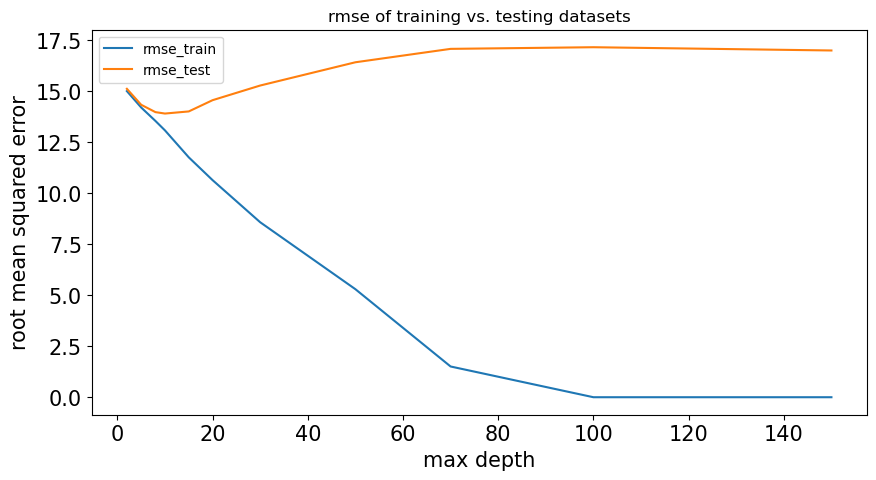

In [185]:
ax = pd.DataFrame.from_dict(rmse_scores).plot(figsize=(10,5),title="rmse of training vs. testing datasets", fontsize=15, x="max_depth")
ax.set_xlabel("max depth", fontsize=15)
ax.set_ylabel("root mean squared error", fontsize=15)

### Underfit

In [187]:
X_train_underfit = X_train
y_train_underfit = y_train

X_test_underfit = X_test
y_test_underfit = y_test

In [188]:
decision_tree_underfit = DecisionTreeRegressor(max_depth=1)
decision_tree_underfit.fit(X_train_underfit, y_train_underfit)

# Training performance

model_at_hand_underfit = decision_tree_underfit

y_pred_underfit = model_at_hand_underfit.predict(X_train_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print("mean_absolute_error", mean_absolute_error(y_train_underfit, y_pred_underfit))
print("mean_squared_error", mean_squared_error(y_train_underfit, y_pred_underfit))
print("root_mean_squared_error", sqrt(mean_squared_error(y_train_underfit, y_pred_underfit)))
print("r2", r2_score(y_train_underfit, y_pred_underfit))

mean_absolute_error 10.015773555744342
mean_squared_error 241.291274496613
root_mean_squared_error 15.533553183242171
r2 0.12439066779724761


In [189]:
# Testing performance

y_pred_underfit = model_at_hand_underfit.predict(X_test_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print("mean_absolute_error", mean_absolute_error(y_test_underfit, y_pred_underfit))
print("mean_squared_error", mean_squared_error(y_test_underfit, y_pred_underfit))
print("root_mean_squared_error", sqrt(mean_squared_error(y_test_underfit, y_pred_underfit)))
print("r2", r2_score(y_test_underfit, y_pred_underfit))

mean_absolute_error 9.984555337773426
mean_squared_error 243.90044678124954
root_mean_squared_error 15.617312405828653
r2 0.12281988677381539


### Random Forest

In [191]:
from sklearn.ensemble import RandomForestRegressor

rando_model = RandomForestRegressor()
rando_model.fit(X_train, y_train)

RandomForestRegressor()

In [192]:
model_at_hand = rando_model

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print("mean_absolute_error", mean_absolute_error(y_test, y_pred))
print("mean_squared_error", mean_squared_error(y_test, y_pred))
print("root_mean_squared_error", sqrt(mean_squared_error(y_test, y_pred)))
print("r2", r2_score(y_test, y_pred))

mean_absolute_error 7.379308808173653
mean_squared_error 173.59680870996462
root_mean_squared_error 13.175614168226263
r2 0.3756646601943918


<Axes: xlabel='true', ylabel='pred'>

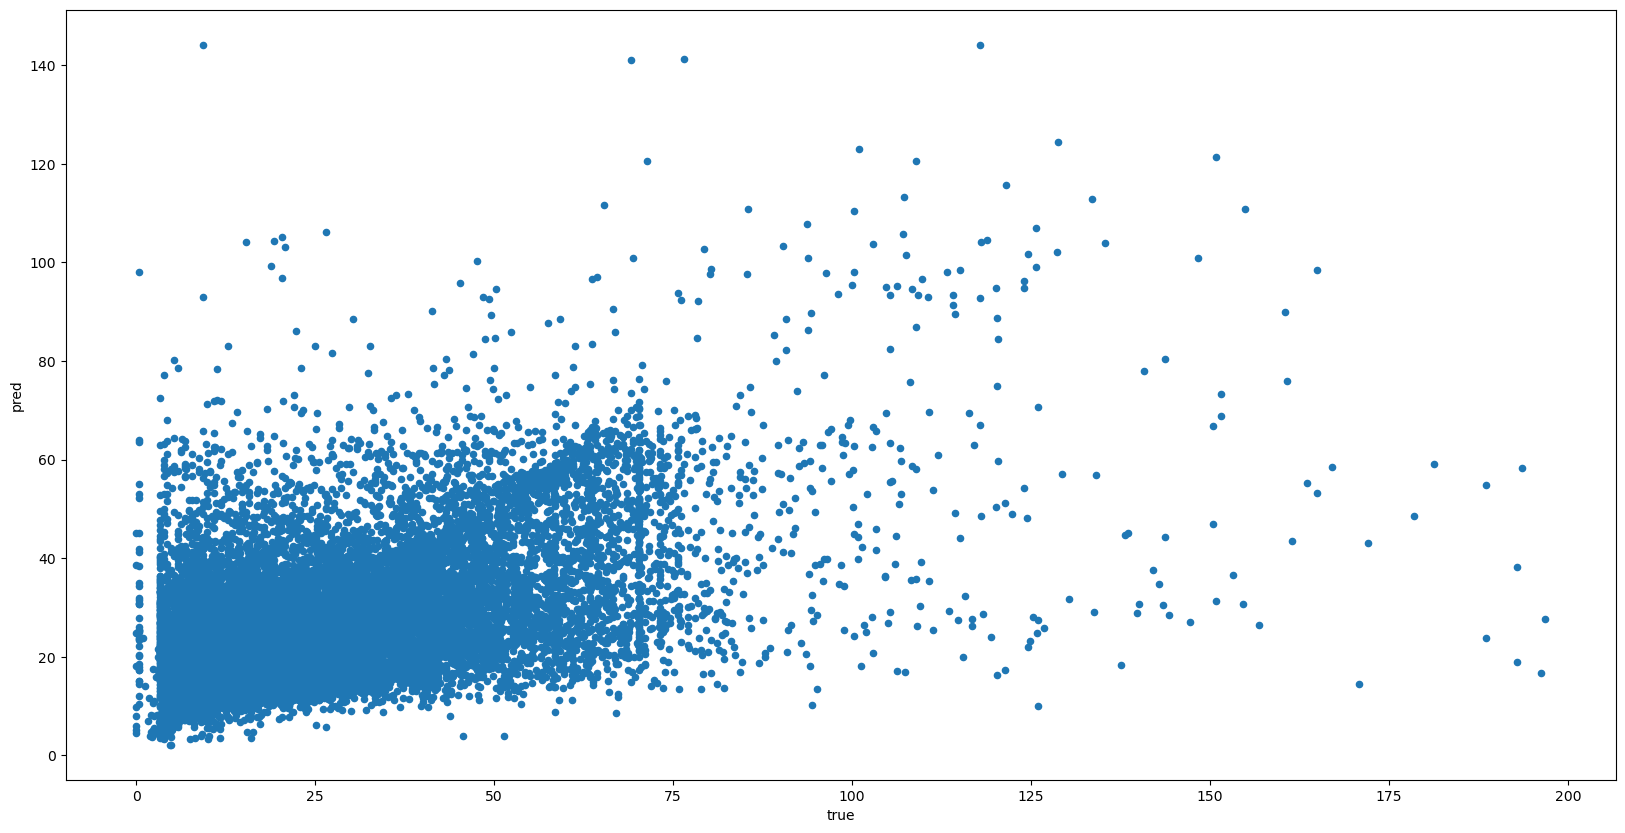

In [193]:
data = {"true": y_test, "pred": y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind="scatter", x="true", y="pred")

### Gradient Boosting

In [195]:
from sklearn.ensemble import GradientBoostingRegressor

gradBooster = GradientBoostingRegressor()
gradBooster.fit(X_train, y_train)

GradientBoostingRegressor()

In [197]:
model_at_hand = gradBooster

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print("mean_absolute_error", mean_absolute_error(y_test, y_pred))
print("mean_squared_error", mean_squared_error(y_test, y_pred))
print("root_mean_squared_error", sqrt(mean_squared_error(y_test, y_pred)))
print("r2", r2_score(y_test, y_pred))

mean_absolute_error 8.318562121977893
mean_squared_error 177.3348098316591
root_mean_squared_error 13.316711674871508
r2 0.36222105937102655


<Axes: xlabel='true', ylabel='pred'>

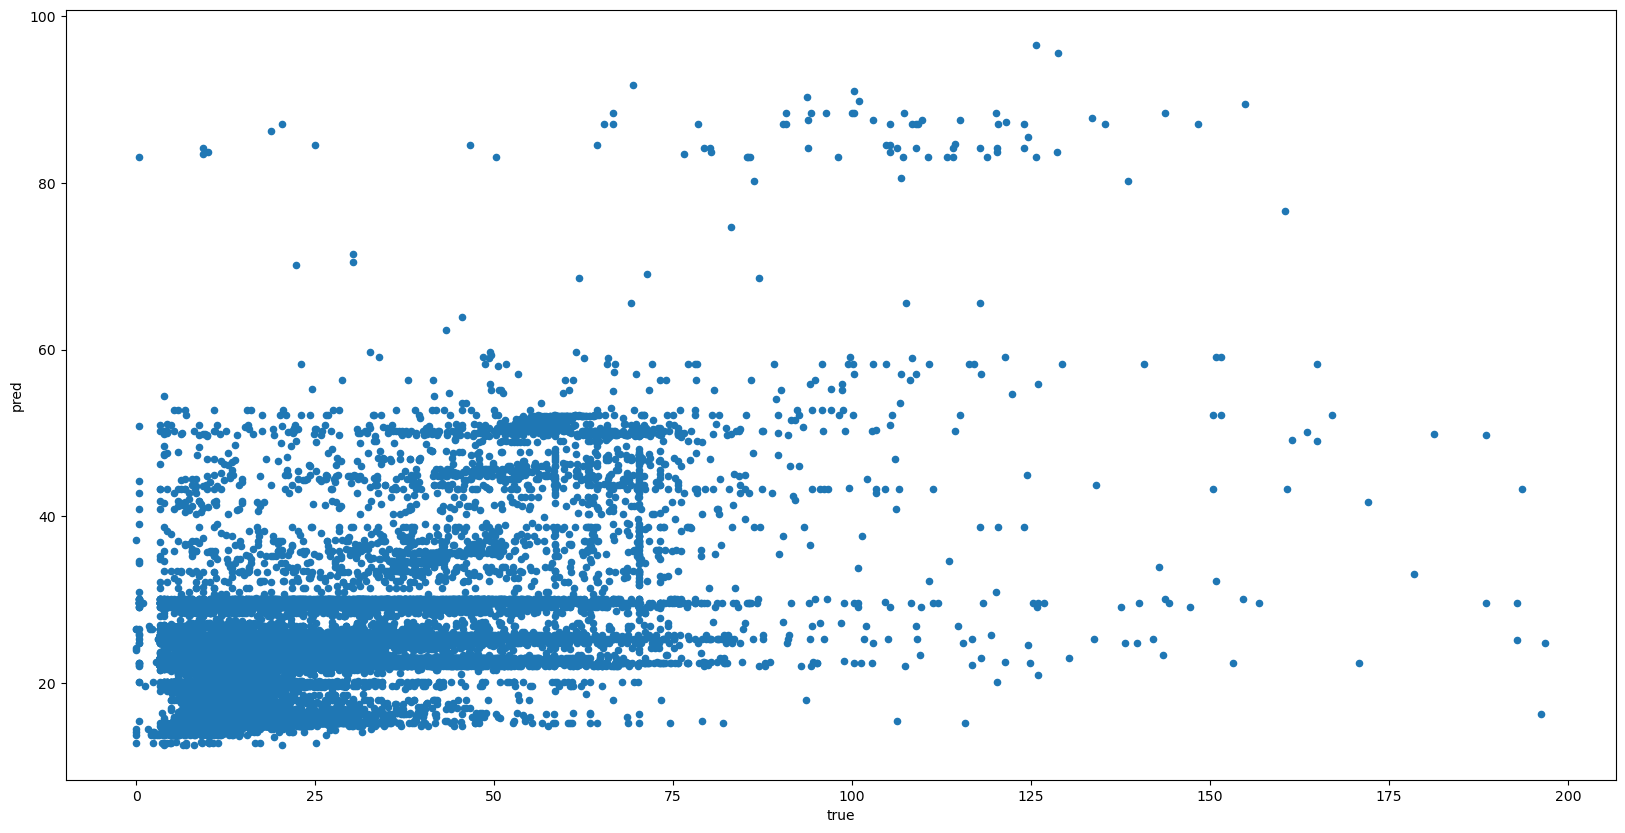

In [199]:
data = {"true": y_test, "pred": y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind="scatter", x="true", y="pred")

<Axes: >

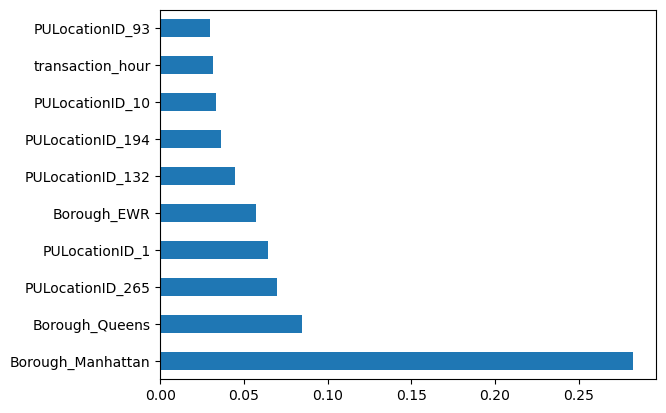

In [200]:
(pd.Series(model_at_hand.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind="barh")) 

### Compare Algorithm Performances

| Algorithm           | MAE   | RMSE   | R2    |
|---------------------|:-----:|:------:|:-----:|
| Benchmark Model     | 9.833 | 14.963 | 0.192 |
| Decision Tree       | 8.389 | 13.865 | 0.309 |
| Random Forest       | 7.379 | 13.176 | 0.376 |
| Gradient Boosting   | 8.319 | 13.317 | 0.362 |

## Tuning

### Find Best Parameters

In [207]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ["auto", "sqrt"]
# Maximum number of levels in tree
max_depth = [10,20,50,100,150,200,300,500]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 40]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 20]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [208]:
import pprint as pp

# Create the random grid
random_grid = {"n_estimators": n_estimators,
               "max_features": max_features,
               "max_depth": max_depth,
               "min_samples_split": min_samples_split,
               "min_samples_leaf": min_samples_leaf,
               "bootstrap": bootstrap}
pp.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 50, 100, 150, 200, 300, 500, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 20, 40],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [209]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

performances = pd.DataFrame.from_dict(rf_random.cv_results_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  10.4s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=40, n_estimators=200; total time=  12.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=1400; total time=  36.2s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1800; total time=   0.0s
[CV] END bootstrap=False, max_depth=500, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estima

/Users/jphan/Work/applied-ml/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jphan/Work/applied-ml/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jphan/Work/applied-ml/env/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/jphan/Work/applied-ml/env/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_

In [210]:
performances

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,32.387959,0.615928,1.783574,0.012664,200,10,1,sqrt,200,False,"{'n_estimators': 200, 'min_samples_split': 10,...",0.397662,0.427562,0.424201,0.416475,0.013373,2
1,12.035646,1.586161,0.340228,0.007362,200,5,4,sqrt,20,True,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.351248,0.365384,0.372299,0.362977,0.008761,6
2,12.875946,0.372679,0.358998,0.004210,200,40,4,sqrt,20,False,"{'n_estimators': 200, 'min_samples_split': 40,...",0.355227,0.365879,0.372437,0.364514,0.007092,5
3,0.028821,0.003181,0.000000,0.000000,400,40,10,auto,20,False,"{'n_estimators': 400, 'min_samples_split': 40,...",NaN,NaN,NaN,NaN,NaN,8
4,0.044823,0.014826,0.000000,0.000000,1000,20,20,auto,50,False,"{'n_estimators': 1000, 'min_samples_split': 20...",NaN,NaN,NaN,NaN,NaN,8
5,199.478647,0.299507,10.982601,0.071320,1200,5,1,sqrt,100,False,"{'n_estimators': 1200, 'min_samples_split': 5,...",0.378106,0.409419,0.404716,0.397414,0.013787,4
6,35.694188,0.416761,1.042674,0.045798,1400,5,20,sqrt,10,True,"{'n_estimators': 1400, 'min_samples_split': 5,...",0.267213,0.275507,0.279624,0.274115,0.005161,7
7,110.861811,1.129555,4.763243,0.357371,1400,10,10,sqrt,None,True,"{'n_estimators': 1400, 'min_samples_split': 10...",0.399838,0.416328,0.419969,0.412045,0.008759,3
8,0.018910,0.003349,0.000000,0.000000,1800,10,2,auto,50,False,"{'n_estimators': 1800, 'min_samples_split': 10...",NaN,NaN,NaN,NaN,NaN,8
9,83.410466,10.102802,3.347730,0.155879,600,10,2,sqrt,500,False,"{'n_estimators': 600, 'min_samples_split': 10,...",0.409766,0.433456,0.434070,0.425764,0.011315,1


[CV] END bootstrap=False, max_depth=200, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  34.8s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1400; total time= 1.9min
[CV] END bootstrap=False, max_depth=200, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  33.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=1400; total time=  37.3s
[CV] END bootstrap=False, max_depth=500, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time= 1.5min
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  14.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=20, min_samples_split=5, n_estimators=1400; total time=  36.8s
[CV] END bootstrap=True, max_d

### Best Model

In [211]:
import time
t0= time.time()

best = RandomForestRegressor(
    n_estimators=600,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features= "sqrt",
    max_depth=500,
    bootstrap=False)
best.fit(X_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print("mean_absolute_error", mean_absolute_error(y_test, y_pred))
print("mean_squared_error", mean_squared_error(y_test, y_pred))
print("root_mean_squared_error", sqrt(mean_squared_error(y_test, y_pred)))
print("r2", r2_score(y_test, y_pred))

Time elapsed:  105.27415108680725  seconds
mean_absolute_error 7.281363899098168
mean_squared_error 161.6830474206681
root_mean_squared_error 12.715464892038675
r2 0.4185121195353244


<Axes: xlabel='true', ylabel='pred'>

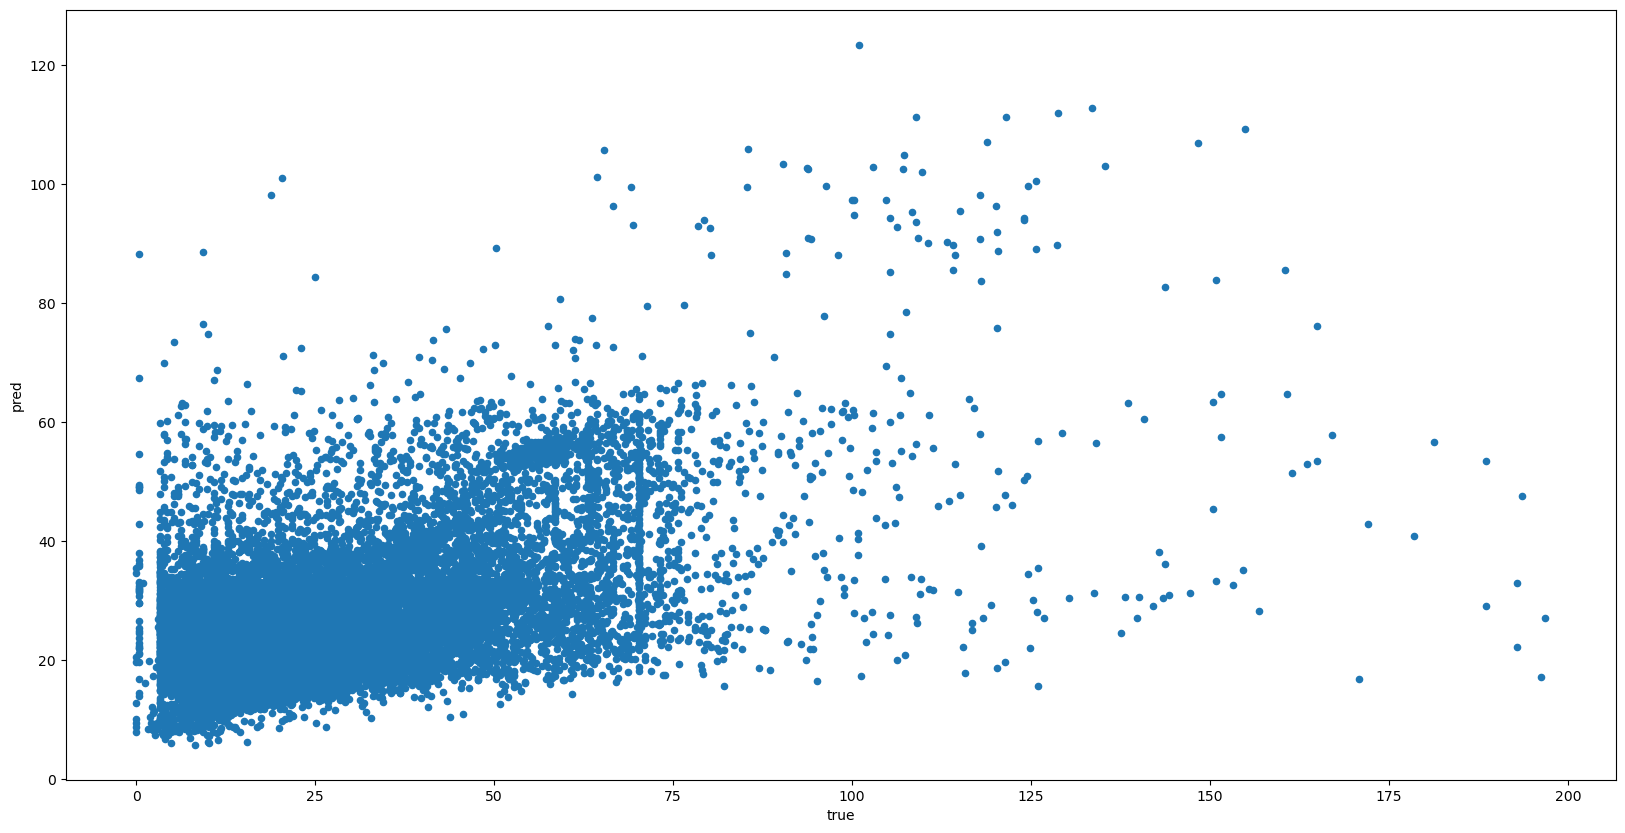

In [214]:
data = {"true": y_test, "pred": y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind="scatter", x="true", y="pred")

### Second-Best Model

In [215]:
import time
t0= time.time()

best = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features="sqrt",
    max_depth=200,
    bootstrap=False)
best.fit(X_train, y_train)

t1 = time.time() - t0
print("Time elapsed: ", t1, " seconds")


model_at_hand = best

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print("mean_absolute_error", mean_absolute_error(y_test, y_pred))
print("mean_squared_error", mean_squared_error(y_test, y_pred))
print("root_mean_squared_error", sqrt(mean_squared_error(y_test, y_pred)))
print("r2", r2_score(y_test, y_pred))

Time elapsed:  36.672056674957275  seconds
mean_absolute_error 7.306053935848288
mean_squared_error 164.8532490282352
root_mean_squared_error 12.839519034147472
r2 0.40711059140458805


<Axes: xlabel='true', ylabel='pred'>

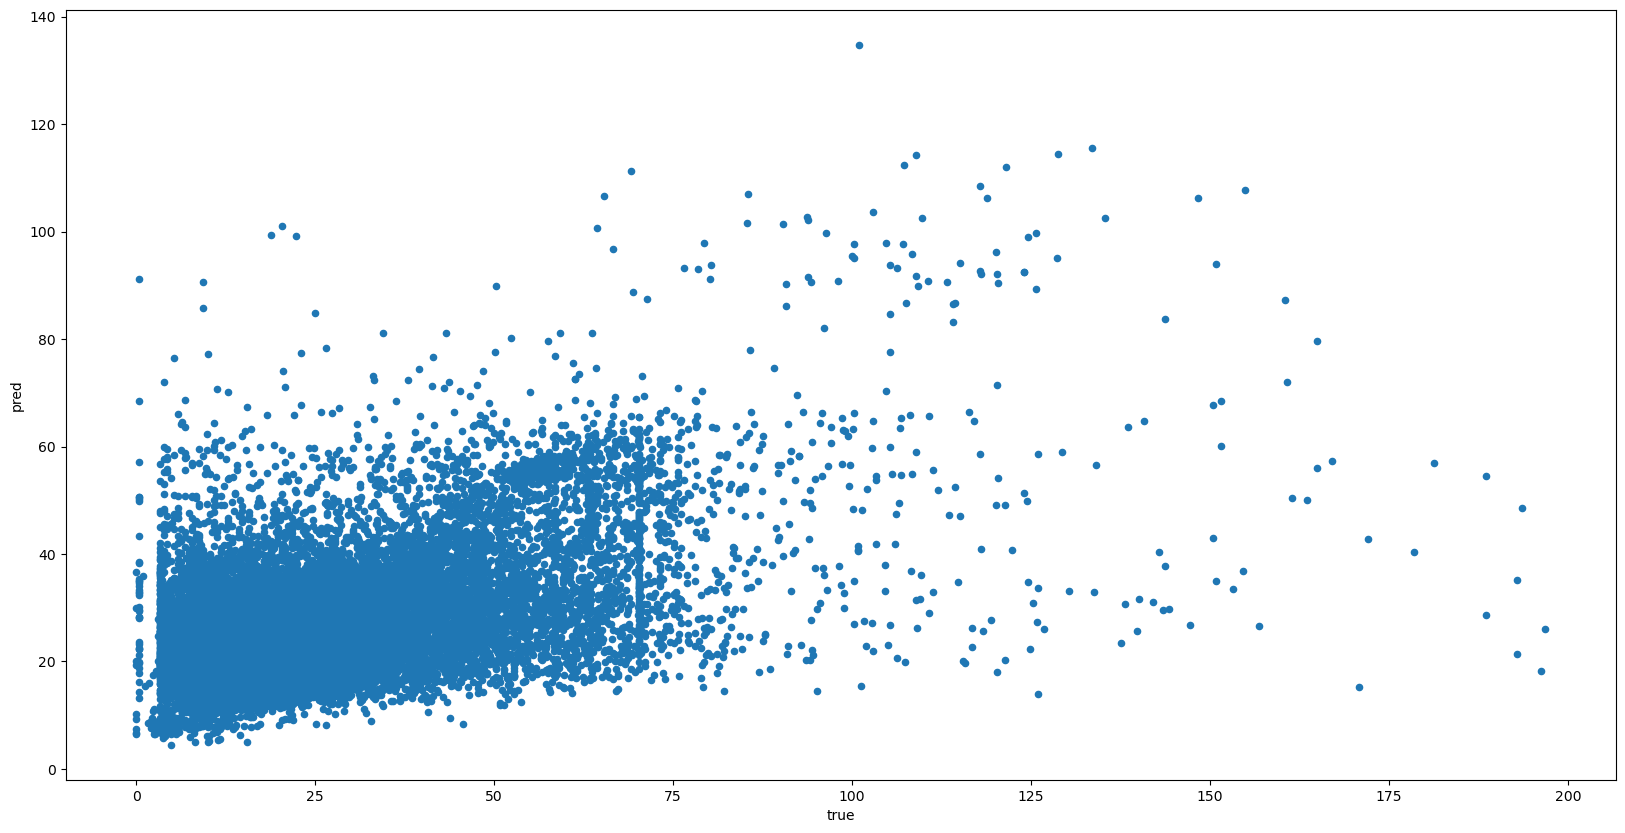

In [216]:
data = {"true": y_test, "pred": y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind="scatter", x="true", y="pred")

## Classification

<Axes: >

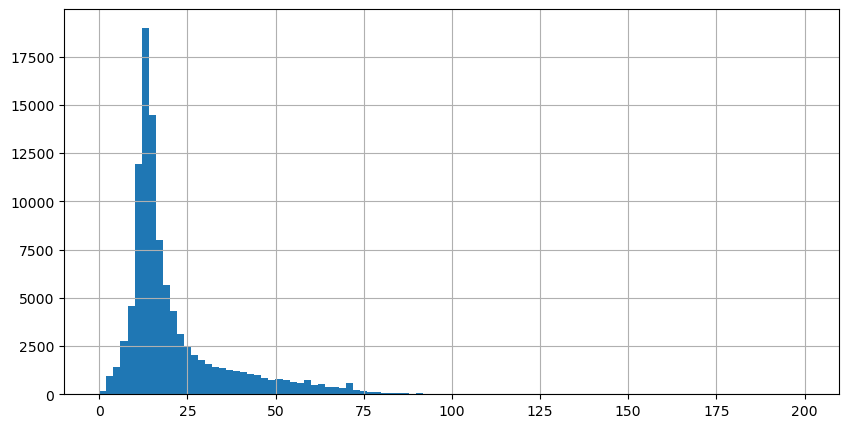

In [218]:
nyc_taxi_with_weather["total_amount"].hist(bins=100, figsize=(10,5))

In [219]:
nyc_class = nyc_taxi_with_weather.copy()
nyc_class["earning_class"] = nyc_taxi_with_weather["total_amount"].apply(lambda x: "low" if x<=15 else "high")
nyc_class["earning_class_binary"] = nyc_class["earning_class"].apply(lambda x: 0 if x=="low" else 1)
nyc_class.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough,temperature,humidity,wind speed,cloud cover,amount of precipitation,earning_class,earning_class_binary
0,10,2019-01-01,1,1,0,3.020000,14.300000,2,1,False,True,Queens,8.3,97.0,0.0,1.0,29.0,low,0
1,100,2019-01-01,1,1,0,2.801852,18.130000,54,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0,high,1
2,106,2019-01-01,1,1,0,2.593333,15.373333,3,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0,high,1
3,107,2019-01-01,1,1,0,2.453438,14.925496,413,1,False,True,Manhattan,8.3,97.0,0.0,1.0,29.0,low,0
4,11,2019-01-01,1,1,0,1.795000,9.300000,2,1,False,True,Brooklyn,8.3,97.0,0.0,1.0,29.0,low,0


In [220]:
nyc_class["earning_class"].value_counts()

earning_class
high    52933
low     49231
Name: count, dtype: int64

In [221]:
categorical_features = ["PULocationID", "transaction_month", "transaction_day",
       "transaction_hour", "transaction_week_day", "weekend", "is_holiday", "Borough"]
input_features = categorical_features + ["temperature", "humidity", "wind speed", "cloud cover",
       "amount of precipitation"]
target_feature = "earning_class_binary"

In [222]:
from sklearn.model_selection import train_test_split

X_c = nyc_class[input_features]
y_c = nyc_class[target_feature]

# one-hot encode
X_c = pd.get_dummies(X_c)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.33, random_state=42)

In [223]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train_c, y_train_c)

y_pred_c = clf.predict(X_test_c)

In [224]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from math import sqrt

print(confusion_matrix(y_test_c, y_pred_c))

print("accuracy", accuracy_score(y_test_c, y_pred_c))
print("precision", precision_score(y_test_c, y_pred_c))
print("recall", recall_score(y_test_c, y_pred_c))

[[11471  4794]
 [ 3816 13634]]
accuracy 0.7446240545751149
precision 0.7398523985239852
recall 0.7813180515759313


<Axes: >

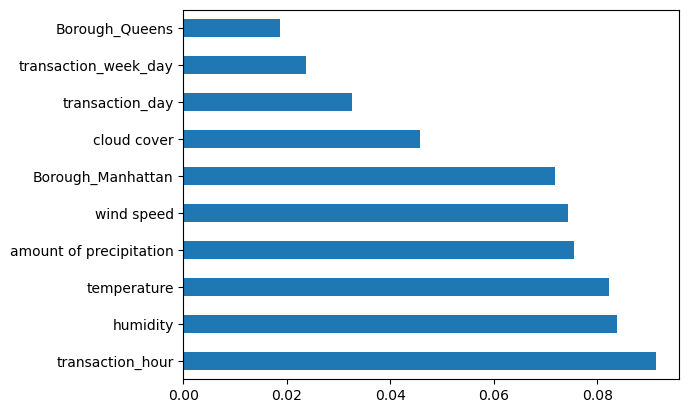

In [225]:
(pd.Series(clf.feature_importances_, index=X_train.columns)
   .nlargest(10)
   .plot(kind="barh"))